In [291]:
# pandas data structures tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [292]:
def plot_J(ax, bbeta_0, bbeta_1, X, y, bbeta_0_deltas = None, bbeta_1_deltas = None, beta_delta = 50):

    bbeta_0_deltas = bbeta_0_deltas or []
    bbeta_1_deltas = bbeta_1_deltas or []

    def get_model(beta_0, beta_1):
        def model(xs):
            return beta_0 + beta_1 * xs[:, 0]
        return model

    def get_costs_for(beta_0, beta_1):
        model = get_model(beta_0, beta_1)
        return mean_squared_error(y, model(X))

    pre = 64
    if len(bbeta_0_deltas) > 0:
        beta_delta = max(*bbeta_0_deltas, beta_delta)
    if len(bbeta_1_deltas) > 0:
        beta_delta = max(*bbeta_1_deltas, beta_delta)

    print(beta_delta)

    beta_0s, beta_1s = np.meshgrid(
        np.linspace(bbeta_0-beta_delta, bbeta_0+beta_delta, pre),
        np.linspace(bbeta_1-beta_delta, bbeta_1+beta_delta, pre)
    )

    costs = np.empty([pre, pre])

    for i in range(0, pre):
        for j in range(0, pre):
            costs[j, i] = get_costs_for(beta_0s[j, i], beta_1s[j, i])

    ax.plot_surface(beta_0s, beta_1s, costs, cmap=cm.jet, alpha=0.5)

    steps_x, steps_y, steps_z = [], [], []
    for bbeta_0_delta, bbeta_1_delta in zip(bbeta_0_deltas, bbeta_1_deltas):
        ebeta_0, ebeta_1 = bbeta_0 - bbeta_0_delta, bbeta_1 - bbeta_1_delta
        steps_x.append(ebeta_0)
        steps_y.append(ebeta_1)
        steps_z.append(get_costs_for(ebeta_0, ebeta_1))
        if bbeta_0_delta != bbeta_0_deltas[-1]:
            ax.plot(xs=[ebeta_0, ebeta_0], ys=[ebeta_1, ebeta_1], zs=[get_costs_for(ebeta_0, ebeta_1) + 2, get_costs_for(bbeta_0, bbeta_1) - 10], c='orange', alpha=0.2)
        else:
            ax.plot(xs=[ebeta_0, ebeta_0], ys=[ebeta_1, ebeta_1], zs=[get_costs_for(ebeta_0, ebeta_1) + 2, get_costs_for(bbeta_0, bbeta_1) - 10], c='green')

    ax.plot(xs=steps_x, ys=steps_y, zs=steps_z, c='red')

    ax.set_xlabel('beta_0')
    ax.set_ylabel('beta_1')
    ax.set_zlabel('cost')

    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([])
    # ax.axes.zaxis.set_ticks([])


In [293]:
def plot_J_contour(ax, bbeta_1, bbeta_2, X, y, bbeta_0_deltas = None, bbeta_1_deltas = None, beta_delta = 50):

    bbeta_0_deltas = bbeta_0_deltas or []
    bbeta_1_deltas = bbeta_1_deltas or []

    def get_model(beta_0, beta_1):
        def model(xs):
            return beta_0 + beta_1 * xs[:, 0]
        return model

    def get_costs_for(beta_1, beta_2):
        model = get_model(beta_1, beta_2)
        return mean_squared_error(y, model(X))

    pre = 64
    if len(bbeta_0_deltas) > 0:
        beta_delta = max(*bbeta_0_deltas, beta_delta)
    if len(bbeta_1_deltas) > 0:
        beta_delta = max(*bbeta_1_deltas, beta_delta)

    beta_0s, beta_1s = np.meshgrid(
        np.linspace(bbeta_1-beta_delta, bbeta_1+beta_delta, pre),
        np.linspace(bbeta_2-beta_delta, bbeta_2+beta_delta, pre)
    )

    costs = np.empty([pre, pre])

    for i in range(0, pre):
        for j in range(0, pre):
            costs[j, i] = get_costs_for(beta_0s[j, i], beta_1s[j, i])

    ax.contour(beta_0s, beta_1s, costs, cmap=cm.jet)

    steps_x, steps_y = [], []
    for bbeta_0_delta, bbeta_1_delta in zip(bbeta_0_deltas, bbeta_1_deltas):
        ebeta_1, ebeta_2 = bbeta_1 - bbeta_0_delta, bbeta_2 - bbeta_1_delta
        steps_x.append(ebeta_1)
        steps_y.append(ebeta_2)
        if bbeta_0_delta != bbeta_0_deltas[-1]:
            ax.scatter(ebeta_1, ebeta_2, c='orange', alpha=0.2)
        else:
            ax.scatter(ebeta_1, ebeta_2, c='green')

    ax.plot(steps_x, steps_y, c='red')

    ax.set_xlabel('beta_0')
    ax.set_ylabel('beta_1')

    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([])


In [294]:
out_dir = os.path.join(os.getcwd(), "../../out")

In [295]:
df = pd.read_csv('data/fish.csv').rename(columns={
    'Width': 'width (cm)',
    'Length1': 'length (cm)',
    'Weight': 'weight (g)'
})

In [296]:
from sklearn.decomposition import PCA

model = LinearRegression(fit_intercept=False)
X_norm = StandardScaler().fit_transform(PCA().fit_transform(StandardScaler().fit_transform(df[['width (cm)', 'length (cm)']])))
y = StandardScaler().fit_transform(df[['weight (g)']])
model.fit(X_norm, y)

bbeta_0 = model.intercept_
bbeta_1 = model.coef_[0][0]

print(bbeta_0, bbeta_1)

0.0 0.9326409080422412


50


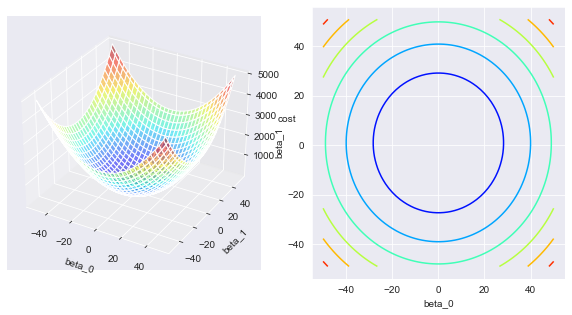

In [297]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_J(ax, bbeta_0, bbeta_1, X_norm, y)
ax2d = fig.add_subplot(1, 2, 2)
ax2d.set_xlim(ax.get_xlim())
ax2d.set_ylim(ax.get_ylim())
plot_J_contour(ax2d, bbeta_0, bbeta_1, X_norm, y)
plt.savefig(os.path.join(out_dir, 'gradient_descent_cost_function.png'))
plt.show()

In [298]:
def plot_gradient_descent(bbeta_1, bbeta_2, X, y, bbeta_1_deltas = None, bbeta_2_deltas = None, beta_delta = 50):
    """
    WARNING: This function does only visualize how gradient descent works.
    The actual plots are a lie :D and do not depend on each other.
    """

    bbeta_1_deltas = bbeta_1_deltas or []
    bbeta_2_deltas = bbeta_2_deltas or []

    fig = plt.figure(figsize=(15, 5), facecolor='white')
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_J(ax, bbeta_1, bbeta_2, X, y, bbeta_1_deltas, bbeta_2_deltas, beta_delta)
    ax_contour = fig.add_subplot(1, 3, 2)
    ax_contour.set_xlim(ax.get_xlim())
    ax_contour.set_ylim(ax.get_ylim())
    plot_J_contour(ax_contour, bbeta_1, bbeta_2, X, y, bbeta_1_deltas, bbeta_2_deltas, beta_delta)
    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(df['width (cm)'], df['weight (g)'], s=1)

    X, y = df[['width (cm)']], df['weight (g)']
    for bbeta_1_delta, bbeta_2_delta in zip(bbeta_1_deltas, bbeta_2_deltas):
        model = LinearRegression()
        model.fit(X, y)
        model.intercept_ -= bbeta_1_delta
        model.coef_ -= bbeta_2_delta
        if bbeta_1_delta != bbeta_1_deltas[-1]:
            ax.plot(df['width (cm)'], model.predict(df[['width (cm)']]), c='orange', alpha=0.2)
        else:
            ax.plot(df['width (cm)'], model.predict(df[['width (cm)']]), c='green')

50


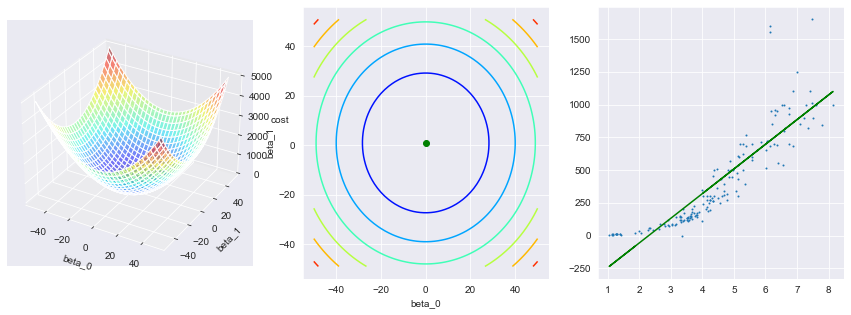

In [299]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [0], [0], 50)
plt.savefig(os.path.join(out_dir, 'gradient_descent_solution.png'))
plt.show()

50


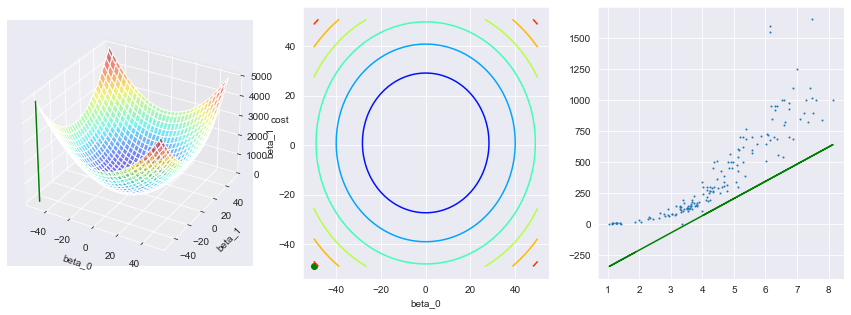

In [300]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50], [50])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_0.png'))
plt.show()

50


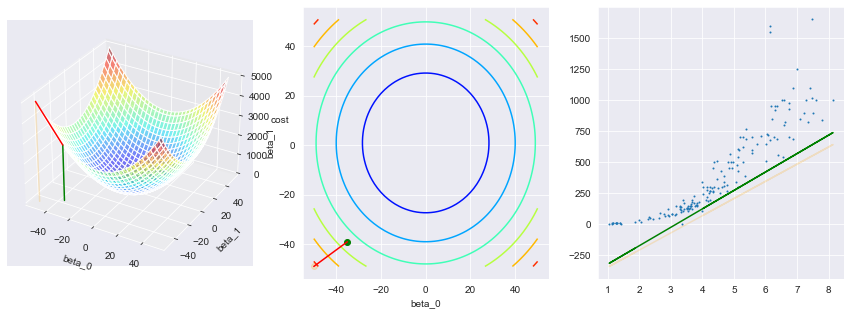

In [301]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50, 35], [50, 40])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_1.png'), transparent=False)
plt.show()

50


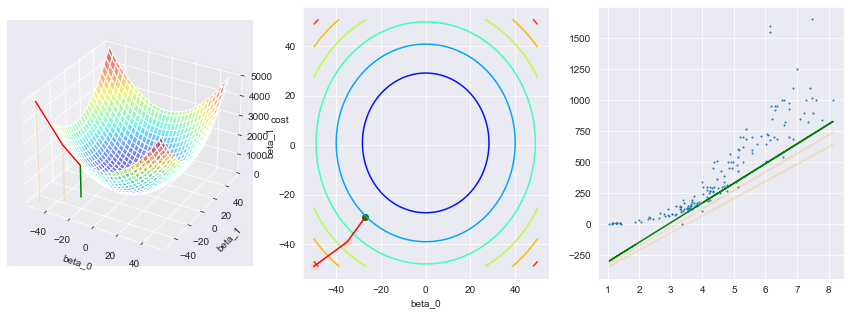

In [302]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50, 35, 27], [50, 40, 30])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_2.png'))
plt.show()

50


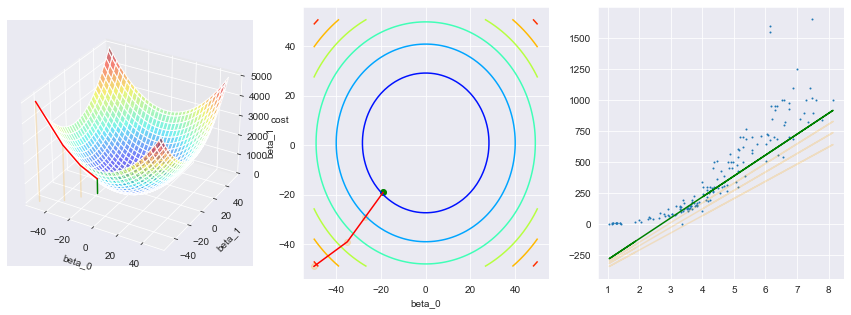

In [303]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50, 35, 27, 19], [50, 40, 30, 20])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_3.png'))
plt.show()

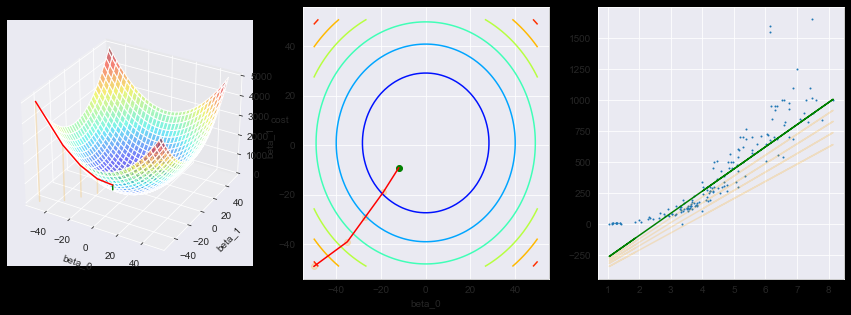

50


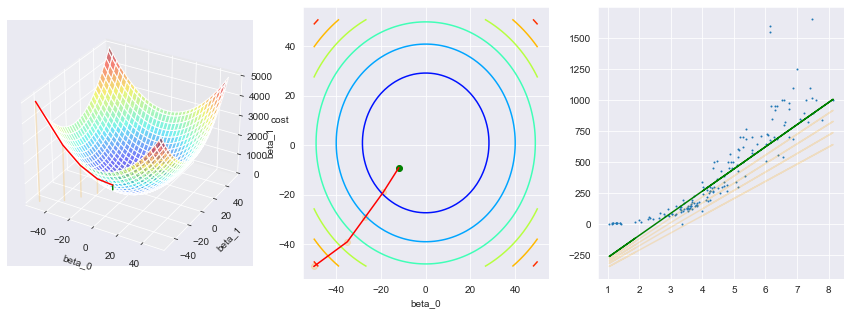

In [304]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50, 35, 27, 19, 12], [50, 40, 30, 20, 10])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_4.png'))
plt.show()

50


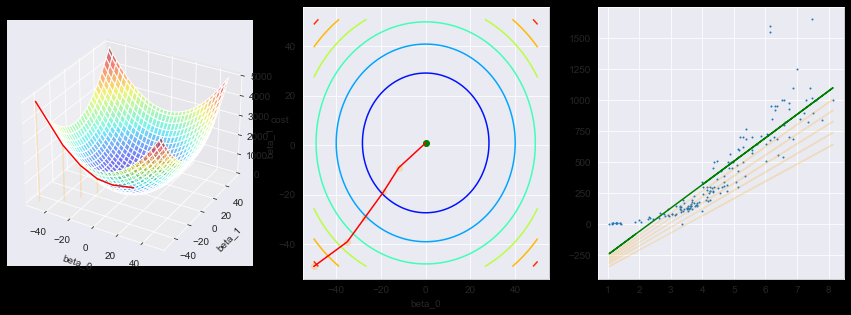

50


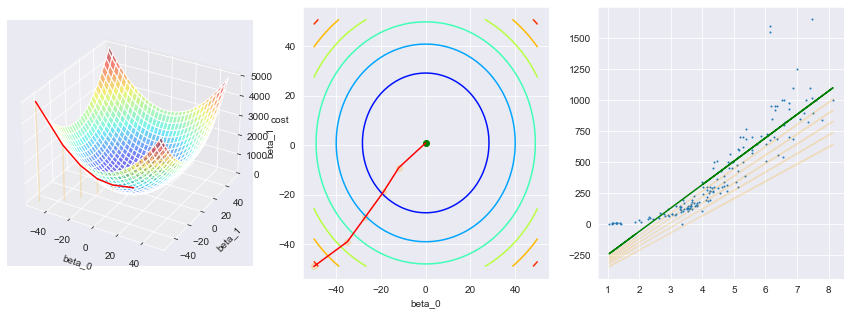

In [305]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [50, 35, 27, 19, 12, 0], [50, 40, 30, 20, 10, 0])
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_5.png'))
plt.show()